In [2]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
# yield_rates

stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
# bank_data.head()

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
# yield_spread.head()

yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
# bank_yield_final.head()
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


In [3]:
dividend_frame = pd.read_csv('data/banks/RY.TO_dividend_extremes.csv', index_col=0)

dividend_yields = []

for i in range(0, len(dividend_frame)):
    div_yield = 400 * (dividend_frame.loc[i]['Dividends'] / dividend_frame.loc[i]['Adj Close'])
    dividend_yields.append(div_yield)

dividend_frame['Dividend Yield'] = dividend_yields
dividend_frame['Month'] = pd.DatetimeIndex(dividend_frame['Date']).month
# dividend_frame
yearly_yield = dividend_frame.loc[dividend_frame['Month'] == 10].reset_index(drop=True)
# print()
dividend_range = df['1995-01-19':'2023-7-24']
# dividend_range

In [4]:
from datetime import datetime

yield_list = []

for i in range(len(yearly_yield) - 1):

    div_yield = yearly_yield.loc[i]['Dividend Yield']

    start_point = yearly_yield.loc[i]['Date']
    end_point = yearly_yield.loc[i+1]['Date']
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    quarter_len = len(dividend_range[start_point: date_str])

    for j in range(quarter_len):
        yield_list.append(div_yield)

# print(len(yield_list))
spread_yield_3 = df['1995-10-23':'2022-10-24'].copy()
spread_yield_3['Dividend Yield'] = yield_list
spread_yield_3

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
1995-10-23,1995-10-23,0.31,0.69,2.727312,-4.769766,Negative Extreme,11.366503
1995-10-24,1995-10-24,0.34,0.64,2.751025,0.869464,Non-Extreme,11.366503
1995-10-25,1995-10-25,0.36,0.61,2.703596,-1.724048,Non-Extreme,11.366503
1995-10-26,1995-10-26,0.45,0.68,2.739644,1.333335,Non-Extreme,11.366503
1995-10-27,1995-10-27,0.41,0.64,2.787073,1.731210,Non-Extreme,11.366503
...,...,...,...,...,...,...,...
2022-10-18,2022-10-18,-0.42,-0.03,119.302925,0.501696,Non-Extreme,3.490205
2022-10-19,2022-10-19,-0.41,0.07,118.419205,-0.740736,Non-Extreme,3.490205
2022-10-20,2022-10-20,-0.38,0.15,116.930313,-1.257306,Non-Extreme,3.490205


In [5]:
spread_yield_3['2007']

/tmp/ipykernel_8214/645099327.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spread_yield_3['2007']


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
2007-01-02,2007-01-02,-0.12,-0.39,28.713099,0.054050,Non-Extreme,6.222274
2007-01-03,2007-01-03,-0.09,-0.38,28.733786,0.072047,Non-Extreme,6.222274
2007-01-04,2007-01-04,-0.09,-0.42,28.490761,-0.845781,Non-Extreme,6.222274
2007-01-05,2007-01-05,-0.11,-0.40,28.180511,-1.088950,Non-Extreme,6.222274
2007-01-08,2007-01-08,-0.12,-0.42,28.128811,-0.183460,Non-Extreme,6.222274
...,...,...,...,...,...,...,...
2007-12-21,2007-12-21,0.99,1.18,26.650240,-0.239939,Non-Extreme,6.968377
2007-12-24,2007-12-24,0.99,0.90,26.890583,0.901842,Non-Extreme,6.968377
2007-12-27,2007-12-27,0.97,1.04,26.522070,-1.370417,Non-Extreme,6.968377


In [6]:
#multiple linear regression model

from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

# df = ry_copy.copy()
# column_2 = 'Dividend Yield' , 'Price/Book'

def SLR(df):
    X = df['spread_10_3']
    X_2 = np.array(X).reshape(-1,1)
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X_2, y)
    fitted_values = regr.predict(X_2)
    df['Fitted Values'] = fitted_values

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    # print('R-Squared: {}'.format(regr.score(X_2,y)))

    # print(regr.coef_)
    # print(regr.feature_names_in_)
    # print(regr.intercept_)

    return regr

def MLR(df, column_2):
    X = df[['spread_10_3', '{}'.format(column_2)]]
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    fitted_values = regr.predict(df[['spread_10_3', '{}'.format(column_2)]])
    df['Fitted Values'] =  fitted_values

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    print('R-Squared: {}'.format(regr.score(X,y)))

    print(regr.coef_)
    print(regr.feature_names_in_)
    print(regr.intercept_)
    # print(df)
    return regr

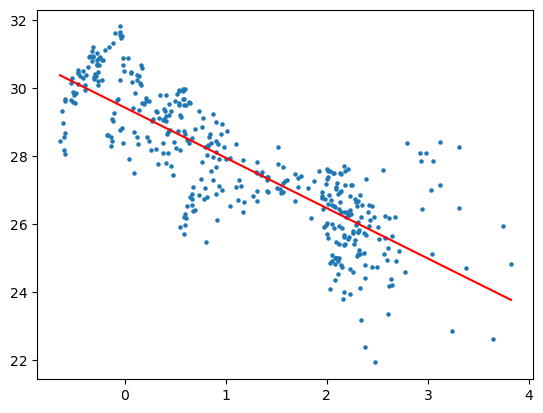

LinearRegression()

In [7]:
dum_gfc = spread_yield_3['2007-02-27':'2008-10-15'].copy()
SLR(dum_gfc)

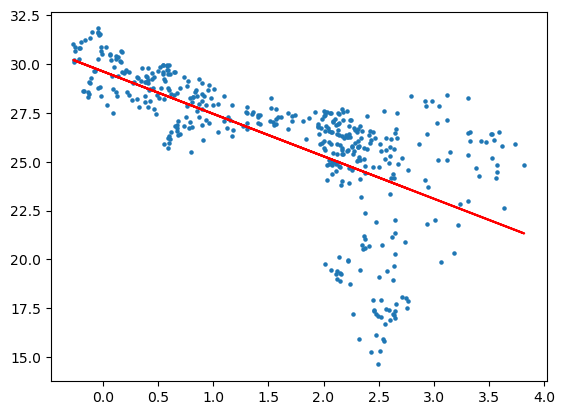

In [8]:
gfc = spread_yield_3['2007-05-01':'2009-02-27'].copy()
# np.array(gfc['spread_10_3']).reshape(-1,1).shape
gfc_model = SLR(gfc)
gfc.to_csv('gfc_follows_yield.csv')

In [9]:
gfc_fitted = gfc.copy().drop(columns=['Date', 'spread_10_2', 'Delta', 'Extremes', 'Dividend Yield'])
gfc_fitted.to_csv('gfc_fitted.csv')

In [10]:
yearly_dividend_13_20 = spread_yield_3['2009':'2020'].copy()

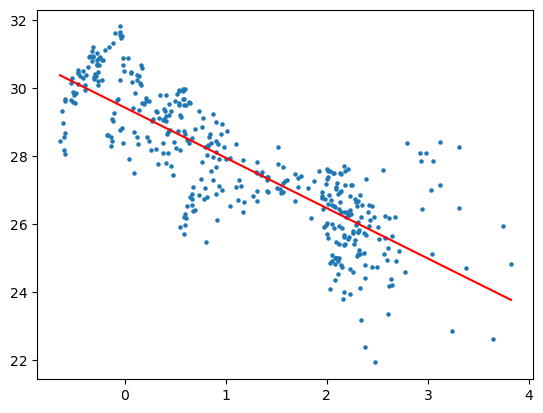

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Adj Fitted,Residuals
Date,,,,,,,,
2023-05-05,2023-05-05,-0.48,-1.82,129.740021,1.400170,Non-Extreme,127.536229,2.203792
2023-05-08,2023-05-08,-0.48,-1.79,130.007263,0.205983,Non-Extreme,127.359532,2.647731
2023-05-09,2023-05-09,-0.48,-1.76,128.106873,-1.461757,Non-Extreme,127.182834,0.924039
2023-05-10,2023-05-10,-0.47,-1.81,127.641701,-0.363112,Non-Extreme,127.477330,0.164371
2023-05-11,2023-05-11,-0.50,-1.81,128.512695,0.682374,Non-Extreme,127.477330,1.035365
...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,120.939515,-7.289513
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,120.468321,-7.438322
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,120.645019,-9.635017


In [11]:
dum_2023 = df['2023-05-04':'2023-10-24'].copy()

fitted_values = SLR(dum_gfc).predict(np.array(dum_2023['spread_10_3']).reshape(-1,1))
# print(fitted_values)

starting_price = dum_2023.loc['2023-05-04']['Adj Close']
adj_fitted = []

for i in range(len(fitted_values) - 1):
    ratio = fitted_values[i+1]/ fitted_values[i]
    starting_price = starting_price * ratio
    adj_fitted.append(starting_price)

# print(adj_fitted)
# print(len(adj_fitted))

df_2023_adj = dum_2023['2023-05-05'::].copy()
actuals = df_2023_adj['Adj Close']

residuals = []

for (i, j) in zip(actuals, adj_fitted):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023_adj['Adj Fitted'] = adj_fitted
df_2023_adj['Residuals'] = residuals

from scipy.stats import t
df_2023_adj
# df_2023_adj.to_csv('follows_yield_2023.csv')

In [12]:
df_2023 = df['2023-02-08'::].copy()
div_yield_2023 = yearly_yield.loc[27]['Dividend Yield']

div_yield_list = []
for i in range(len(df_2023)):
    div_yield_list.append(div_yield_2023)

df_2023['Dividend Yield'] = div_yield_list
df_2023

# degrees of freedom = 175 - (2 + 1) = 172
# alpha = 0.05

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
2023-02-08,2023-02-08,-0.82,-1.09,136.775894,0.670900,Non-Extreme,4.25846
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846
...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846


In [13]:
fitted_values = gfc_model.predict(np.array(df_2023['spread_10_3']).reshape(-1,1))
df_2023['Fitted Values'] = fitted_values
# df_2023

starting_price = df_2023.loc['2023-02-08']['Adj Close']
# print(starting_price)

adj_fitted = []

for i in range(len(fitted_values) - 1):
    ratio = fitted_values[i+1]/ fitted_values[i]
    starting_price = starting_price * ratio
    adj_fitted.append(starting_price)

# print(adj_fitted)
# print(len(adj_fitted))

df_2023_adj = df_2023['2023-02-09'::].copy()
actuals = df_2023_adj['Adj Close']

residuals = []

for (i, j) in zip(actuals, adj_fitted):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023_adj['Adj Fitted'] = adj_fitted
df_2023_adj['Residuals'] = residuals
df_2023_adj


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,32.007990,136.868679,-0.386822
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,31.899497,136.404756,-0.403169
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,31.986291,136.775894,-0.548874
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,31.856100,136.219187,-0.129374
2023-02-15,2023-02-15,-0.81,-0.98,135.913391,-0.129636,Non-Extreme,4.25846,31.747608,135.755264,0.158127
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,31.140050,133.157297,-19.507295
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,30.966461,132.415021,-19.385022
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,31.031557,132.693375,-21.683373


1.9739339540980687


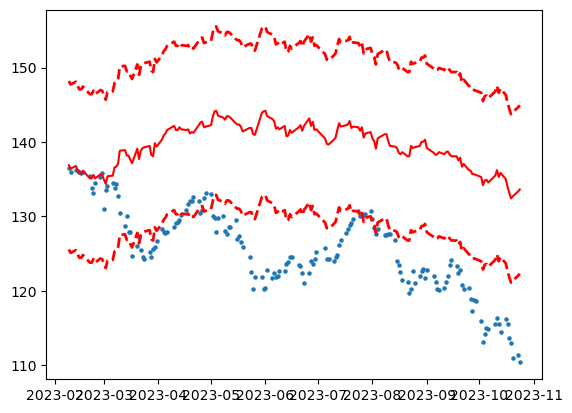

In [14]:
from scipy.stats import t

critical_value = t.ppf(q = 1-0.025, df = 171) # critical value
print(critical_value)
std_error = np.std(residuals)

band_width = critical_value * std_error

upper = []
lower = []

for i in adj_fitted:
    upper.append(i + band_width)
    lower.append(i - band_width)

x = df_2023_adj['Date']
y = df_2023_adj['Adj Close']
y_hat = df_2023_adj['Adj Fitted']
plt.scatter(x, y, s=5)
plt.plot(x, y_hat, color = 'red')
plt.plot(x, upper, 'r--', lw = 2)
plt.plot(x, lower, 'r--', lw = 2)
plt.show() 

In [15]:
df_2023_adj['Upper'] = upper
df_2023_adj['Lower'] = lower

gfc_2023_adj = df_2023_adj.copy().drop(columns=['Date', 'spread_10_2','Delta', 
                                                    'Extremes', 'Dividend Yield', 'Fitted Values'])
gfc_2023_adj.to_csv('gfc_2023.csv')

In [16]:
# fitted_bull = MLR(yearly_dividend_13_20, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
# df_2023_bull = df_2023.copy()
# df_2023_bull['Fitted Values'] = fitted_bull
# df_2023_bull
# print(fitted_bull)

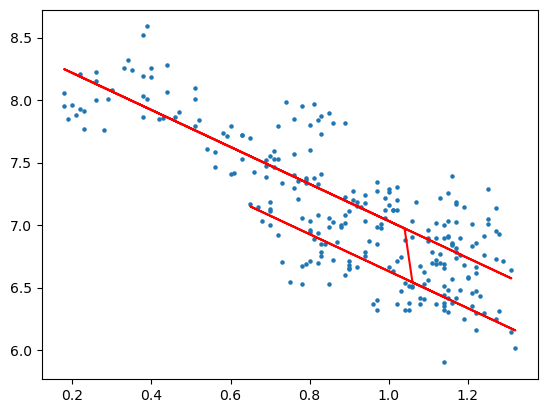

R-Squared: 0.7402693455363282
[-1.48151994 -0.67607245]
['spread_10_3' 'Dividend Yield']
13.097920302098371


LinearRegression()

In [17]:
bear_market_99 = spread_yield_3['1999':'2000-01-24'].copy()
# bear_market_99
MLR(bear_market_99, 'Dividend Yield')

In [18]:
bear_market_99

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values
Date,,,,,,,,
1999-01-04,1999-01-04,0.11,0.20,7.963936,1.436980,Non-Extreme,6.780189,8.217718
1999-01-05,1999-01-05,0.10,0.26,7.999830,0.450707,Non-Extreme,6.780189,8.128826
1999-01-06,1999-01-06,0.11,0.26,8.225467,2.820522,Positive Extreme,6.780189,8.128826
1999-01-07,1999-01-07,0.14,0.33,8.256234,0.374046,Non-Extreme,6.780189,8.025120
1999-01-08,1999-01-08,0.15,0.38,8.522899,3.229862,Positive Extreme,6.780189,7.951044
...,...,...,...,...,...,...,...,...
2000-01-18,2000-01-18,0.28,1.19,6.250862,-1.900837,Non-Extreme,7.374519,6.349202
2000-01-19,2000-01-19,0.27,1.22,6.156071,-1.516447,Non-Extreme,7.374519,6.304757
2000-01-20,2000-01-20,0.30,1.31,6.140274,-0.256608,Non-Extreme,7.374519,6.171420


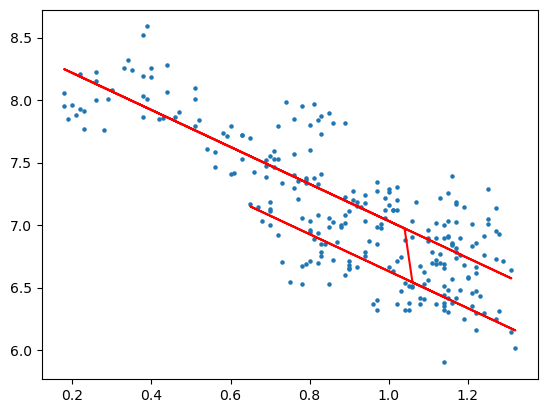

R-Squared: 0.7402693455363282
[-1.48151994 -0.67607245]
['spread_10_3' 'Dividend Yield']
13.097920302098371


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,11.848564,136.947130,-0.465273
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,11.774488,136.090951,-0.089364
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,11.833749,136.775894,-0.548874
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,11.744858,135.748479,0.341334
2023-02-15,2023-02-15,-0.81,-0.98,135.913391,-0.129636,Non-Extreme,4.25846,11.670782,134.892300,1.021091
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,11.255957,130.097696,-16.447694
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,11.137435,128.727809,-15.697810
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,11.181881,129.241517,-18.231515


In [19]:
fitted_values = MLR(bear_market_99, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
df_2023['Fitted Values'] = fitted_values

starting_price = df_2023.loc['2023-02-08']['Adj Close']
# print(starting_price)

adj_fitted = []

for i in range(len(fitted_values) - 1):
    ratio = fitted_values[i+1]/ fitted_values[i]
    starting_price = starting_price * ratio
    adj_fitted.append(starting_price)

# print(adj_fitted)
# print(len(adj_fitted))

df_2023_adj = df_2023['2023-02-09'::].copy()
actuals = df_2023_adj['Adj Close']

residuals = []

for (i, j) in zip(actuals, adj_fitted):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023_adj['Adj Fitted'] = adj_fitted
df_2023_adj['Residuals'] = residuals
df_2023_adj


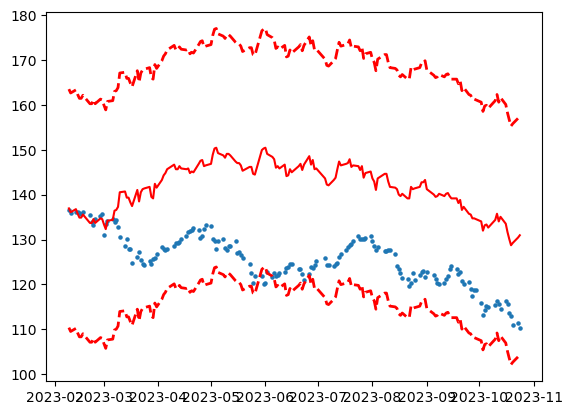

In [20]:
from scipy.stats import t
import numpy as np

critical_value = t.ppf(q = 1-0.025, df = 171) # critical value
std_error = np.std(residuals)

band_width = critical_value * (2 * std_error)

upper = []
lower = []

for i in adj_fitted:
    upper.append(i + band_width)
    lower.append(i - band_width)

x = df_2023_adj['Date']
y = df_2023_adj['Adj Close']
y_hat = df_2023_adj['Adj Fitted']
plt.scatter(x, y, s=5)
plt.plot(x, y_hat, color = 'red')
plt.plot(x, upper, 'r--', lw = 2)
plt.plot(x, lower, 'r--', lw = 2)
plt.show()

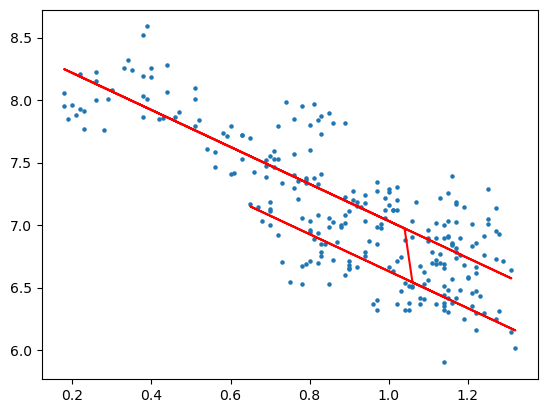

R-Squared: 0.7402693455363282
[-1.48151994 -0.67607245]
['spread_10_3' 'Dividend Yield']
13.097920302098371


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-08,2023-02-08,-0.82,-1.09,136.775894,0.670900,Non-Extreme,4.25846,11.833749,118.337493,18.438401
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,11.848564,118.485645,17.996212
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,11.774488,117.744885,18.256702
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,11.833749,118.337493,17.889527
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,11.744858,117.448581,18.641232
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,11.255957,112.559565,1.090437
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,11.137435,111.374349,1.655650
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,11.181881,111.818805,-0.808803


In [21]:
# df_2023
# multiply fitted values by 11

fitted_values = MLR(bear_market_99, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
df_2023['Fitted Values'] = fitted_values
# df_2023

fitted_dummy = df_2023['Fitted Values'] * 10.
actuals = df_2023['Adj Close']

residuals = []

for (i, j) in zip(actuals, fitted_dummy):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023['Adj Fitted'] = fitted_dummy
df_2023['Residuals'] = residuals
df_2023

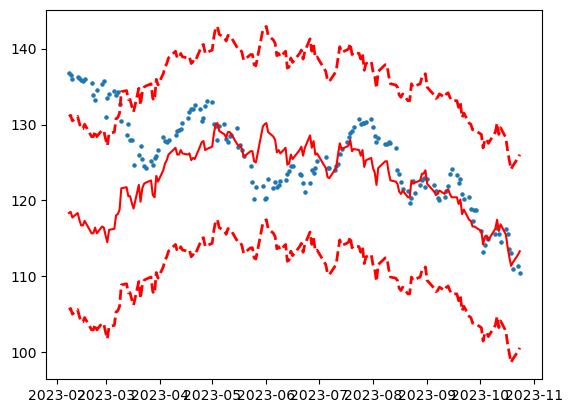

In [22]:
from scipy.stats import t
import numpy as np

critical_value = t.ppf(q = 1-0.025, df = 172) # critical value
std_error = np.std(residuals)

band_width = critical_value * std_error

upper = []
lower = []

for i in fitted_dummy:
    upper.append(i + band_width)
    lower.append(i - band_width)

x = df_2023['Date']
y = df_2023['Adj Close']
y_hat = df_2023['Adj Fitted']
plt.scatter(x, y, s=5)
plt.plot(x, y_hat, color = 'red')
plt.plot(x, upper, 'r--', lw = 2)
plt.plot(x, lower, 'r--', lw = 2)
plt.show()

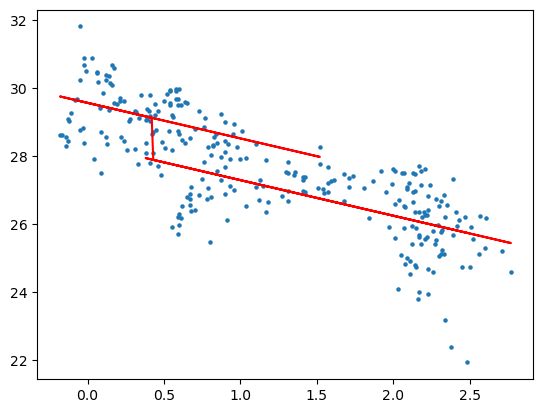

R-Squared: 0.6832049571265477
[-1.04807581 -1.64744195]
['spread_10_3' 'Dividend Yield']
39.82104367266009


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-08,2023-02-08,-0.82,-1.09,136.775894,0.670900,Non-Extreme,4.25846,33.947880,101.843640,34.932254
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,33.958361,101.875082,34.606775
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,33.905957,101.717871,34.283716
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,33.947880,101.843640,34.383380
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,33.884995,101.654986,34.434827
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,33.539130,100.617391,13.032611
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,33.455284,100.365853,12.664146
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,33.486727,100.460180,10.549822


In [23]:
# 2007-05-24 : 2009-02-23

bear_market_07_09 = spread_yield_3['2007-05-24':'2008-07-15'].copy()
# MLR(bear_market_07_09, 'Dividend Yield')

fitted_values = MLR(bear_market_07_09, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
df_2023['Fitted Values'] = fitted_values
# df_2023

fitted_dummy = df_2023['Fitted Values'] * 3.
actuals = df_2023['Adj Close']

residuals = []

for (i, j) in zip(actuals, fitted_dummy):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023['Adj Fitted'] = fitted_dummy
df_2023['Residuals'] = residuals
df_2023

In [24]:
# MLR(bear_market_07_09, 'Dividend Yield')
bear_market_07_09

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values
Date,,,,,,,,
2007-05-24,2007-05-24,0.01,-0.05,31.820581,0.530648,Non-Extreme,6.222274,29.622612
2007-05-25,2007-05-25,0.01,-0.02,30.880966,-2.952853,Negative Extreme,6.222274,29.591170
2007-05-29,2007-05-29,0.00,-0.02,30.676250,-1.033028,Non-Extreme,6.222274,29.591170
2007-05-30,2007-05-30,-0.01,0.03,30.880966,0.667344,Non-Extreme,6.222274,29.538766
2007-05-31,2007-05-31,-0.02,0.17,30.592266,-0.934880,Non-Extreme,6.222274,29.392035
...,...,...,...,...,...,...,...,...
2008-07-09,2008-07-09,1.44,2.03,24.090971,-4.000029,Negative Extreme,6.968377,26.213453
2008-07-10,2008-07-10,1.39,2.16,23.801847,-1.200134,Non-Extreme,6.968377,26.077203
2008-07-11,2008-07-11,1.37,2.34,23.179924,-2.612919,Non-Extreme,6.968377,25.888550


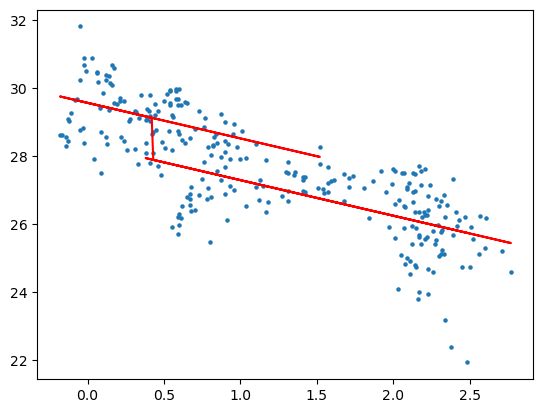

R-Squared: 0.6832049571265477
[-1.04807581 -1.64744195]
['spread_10_3' 'Dividend Yield']
39.82104367266009


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,33.958361,136.818121,-0.336264
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,33.905957,136.606986,-0.605399
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,33.947880,136.775894,-0.548874
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,33.884995,136.522532,-0.432719
2023-02-15,2023-02-15,-0.81,-0.98,135.913391,-0.129636,Non-Extreme,4.25846,33.832592,136.311398,-0.398007
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,33.539130,135.129043,-21.479041
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,33.455284,134.791228,-21.761229
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,33.486727,134.917909,-23.907907


In [25]:
fitted_values = MLR(bear_market_07_09, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
df_2023['Fitted Values'] = fitted_values

starting_price = df_2023.loc['2023-02-08']['Adj Close']
# print(starting_price)

adj_fitted = []

for i in range(len(fitted_values) - 1):
    ratio = fitted_values[i+1]/ fitted_values[i]
    starting_price = starting_price * ratio
    adj_fitted.append(starting_price)

# print(adj_fitted)
# print(len(adj_fitted))

df_2023_adj = df_2023['2023-02-09'::].copy()
actuals = df_2023_adj['Adj Close']

residuals = []

for (i, j) in zip(actuals, adj_fitted):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023_adj['Adj Fitted'] = adj_fitted
df_2023_adj['Residuals'] = residuals
df_2023_adj

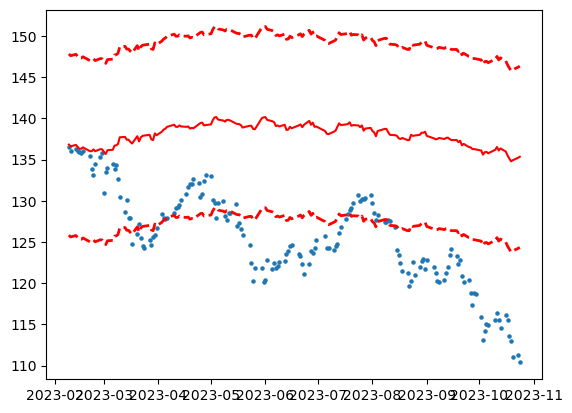

In [26]:
critical_value = t.ppf(q = 1-0.025, df = 171) # critical value
std_error = np.std(residuals)

band_width = critical_value * std_error

upper = []
lower = []

for i in adj_fitted:
    upper.append(i + band_width)
    lower.append(i - band_width)

x = df_2023_adj['Date']
y = df_2023_adj['Adj Close']
y_hat = df_2023_adj['Adj Fitted']
plt.scatter(x, y, s=5)
plt.plot(x, y_hat, color = 'red')
plt.plot(x, upper, 'r--', lw = 2)
plt.plot(x, lower, 'r--', lw = 2)
plt.show()

- display fitted values of models in price vs yield spread scatterplots in tableau
- show differences in the models, including R-Squared
- use bear market models to create prediction intervals for 2023 prices based on yield spread and dividend yield